# Flights delays and cancellations
## by Omneya Essam

## Investigation Overview

what is the reason behind most delays ?
what is the reason behind most cancellations?

## Dataset Overview

The dataset reports flights in the United States, including carriers, delays and cancellations from 2016 to 2020.The detaset includes about 70,000 observations.We will try to resolve the following questions:-


In [9]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("flights.csv")
df.tail(5)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
63547,2019,1,MQ,Envoy Air,RIC,"Richmond, VA: Richmond International",195.0,68.0,12.12,1.87,...,36.04,22.0,0.0,4138.0,603.0,196.0,780.0,0.0,2559.0,NaN
63548,2019,1,MQ,Envoy Air,ROA,"Roanoke, VA: Roanoke Blacksburg Regional Woodr...",52.0,14.0,2.74,0.69,...,8.11,2.0,1.0,726.0,323.0,31.0,112.0,0.0,260.0,NaN
63549,2019,1,MQ,Envoy Air,ROC,"Rochester, NY: Greater Rochester International",106.0,26.0,4.67,2.26,...,7.26,17.0,0.0,1259.0,313.0,99.0,484.0,0.0,363.0,NaN
63550,2019,1,MQ,Envoy Air,RST,"Rochester, MN: Rochester International",116.0,35.0,6.83,6.92,...,9.75,22.0,0.0,2307.0,474.0,633.0,523.0,0.0,677.0,NaN
63551,2019,1,MQ,Envoy Air,SAT,"San Antonio, TX: San Antonio International",26.0,4.0,1.16,0.64,...,0.29,5.0,0.0,120.0,50.0,14.0,41.0,0.0,15.0,NaN


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

In [4]:
df = df.drop('Unnamed: 21',axis=1)
df = df.dropna()
df['city'] = df['airport_name'].str.split(',').str[-1].str.split(':').str[0]
df['city']

KeyError: "['Unnamed: 21'] not found in axis"

In [ ]:
### Number of air flights per month per airport and carier

## Number of air flights per month per airport and carier

Text(0.5, 1.0, 'Number of flights per Carrier')

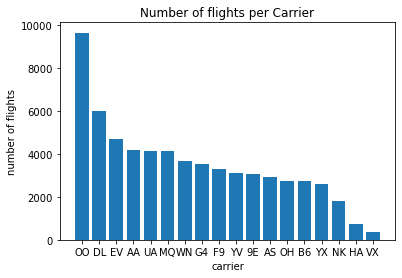

In [5]:
airlines = df.carrier.value_counts()
plt.bar(airlines.index, airlines)
plt.xlabel('carrier')
plt.ylabel('number of flights')
plt.title('Number of flights per Carrier')

## Number of flights in each city

Text(0.5, 1.0, 'Number of flights in each city')

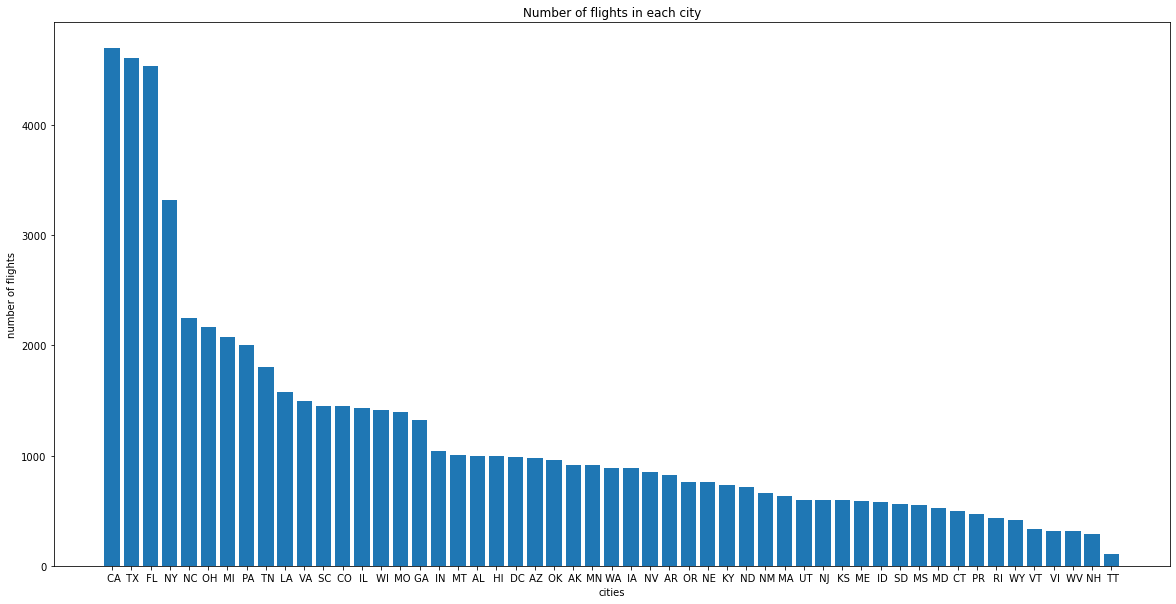

In [6]:
cities = df.city.value_counts()
plt.figure(figsize=[20,10])
plt.bar(cities.index, cities)
plt.xlabel('cities')
plt.ylabel('number of flights')
plt.title('Number of flights in each city')

## Correlation Heatmap

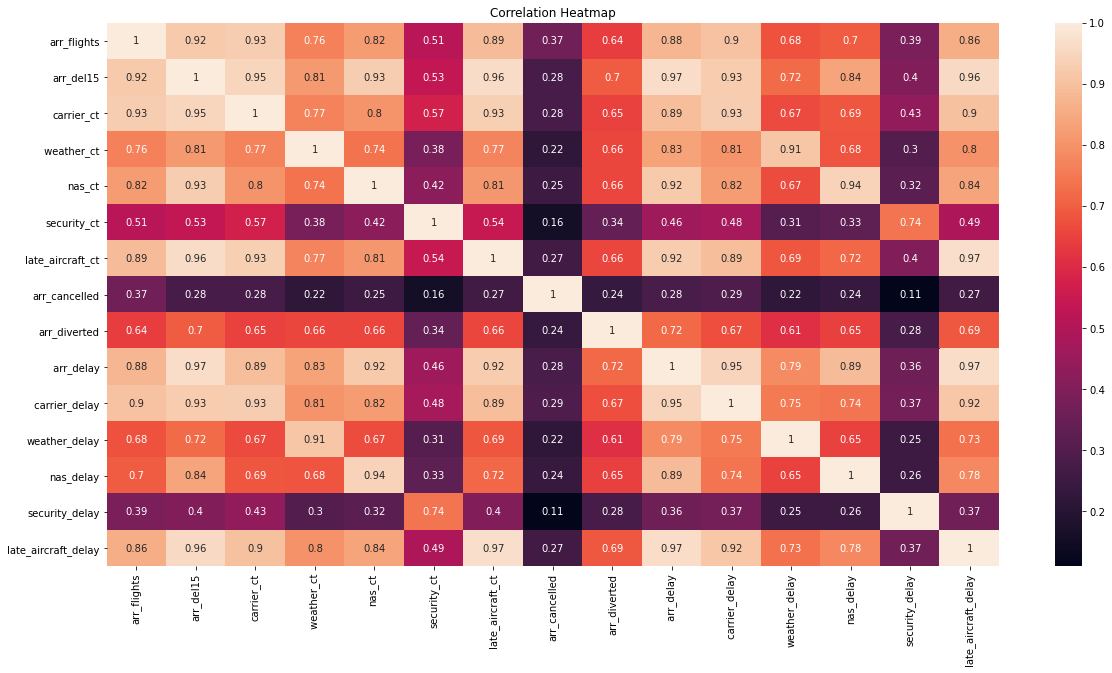

In [10]:
df_corr = df.drop(['year',' month','carrier','carrier_name','airport','airport_name','city'],axis=1).corr()
plt.figure(figsize=(20,10))
sn.heatmap(df_corr, annot=True)
plt.title('Correlation Heatmap')
plt.show()

## Percentage of each cancellation reason

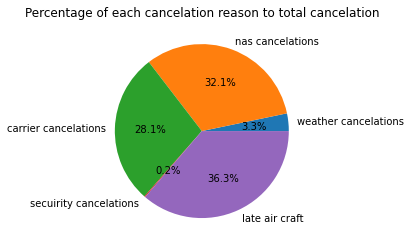

In [12]:
wethear_ct_sum= df[' weather_ct'].sum()
nas_ct_sum= df['nas_ct'].sum()
carrier_ct_sum= df['carrier_ct'].sum()
secuirity_ct_sum =df['security_ct'].sum()
late_aircraft_sum = df['late_aircraft_ct'].sum()
total_cancelation = wethear_ct_sum+nas_ct_sum+carrier_ct_sum+secuirity_ct_sum+late_aircraft_sum
wethear_ct_sum=(wethear_ct_sum/total_cancelation)*100
nas_ct_sum=(nas_ct_sum/total_cancelation)*100
carrier_ct_sum=(carrier_ct_sum/total_cancelation)*100
secuirity_ct_sum=(secuirity_ct_sum/total_cancelation)*100
late_aircraft_sum=(late_aircraft_sum/total_cancelation)*100
X = ['weather cancelations','nas cancelations', 'carrier cancelations', 'secuirity cancelations','late air craft']
Y = [wethear_ct_sum,nas_ct_sum,carrier_ct_sum, secuirity_ct_sum,late_aircraft_sum]
plt.pie(Y, labels=X , autopct='%1.1f%%')
plt.title('Percentage of each cancelation reason to total cancelation')
plt.show()

## Percentage of each delay reason 

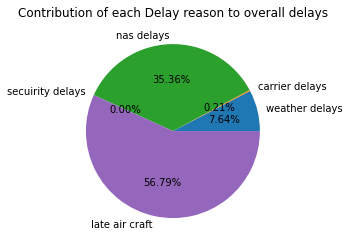

In [14]:
wethear_ct_sum= df['weather_delay'].sum()
nas_ct_sum= df['nas_delay'].sum()
carrier_ct_sum= df[' carrier_delay'].sum()
carrier_ct_sum =df['security_delay'].sum()
late_aircraft_sum = df['late_aircraft_delay'].sum()
total_cancelation = wethear_ct_sum+nas_ct_sum+carrier_ct_sum+secuirity_ct_sum+late_aircraft_sum
wethear_ct_sum=(wethear_ct_sum/total_cancelation)*100
nas_ct_sum=(nas_ct_sum/total_cancelation)*100
carrier_ct_sum=(carrier_ct_sum/total_cancelation)*100
secuirity_ct_sum=(secuirity_ct_sum/total_cancelation)*100
late_aircraft_sum=(late_aircraft_sum/total_cancelation)*100
X = ['weather delays','carrier delays' , 'nas delays', 'secuirity delays','late air craft']
Y = [wethear_ct_sum,carrier_ct_sum, nas_ct_sum, secuirity_ct_sum,late_aircraft_sum]
plt.pie(Y, labels=X , autopct='%1.2f%%')
plt.title('Contribution of each Delay reason to overall delays')
plt.show()

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [28]:
!jupyter nbconvert --to slides slide_deck_template.ipynb


[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 835355 bytes to slide_deck_template.slides.html
